# Deteksi Buah dan Sayuran V1

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d kaustubhb999/tomatoleaf

 98% 176M/179M [00:01<00:00, 139MB/s]
100% 179M/179M [00:01<00:00, 134MB/s]


In [6]:
! unzip /content/tomatoleaf.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-

In [7]:
import os
base_dir = "/content/tomato"

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/val'))

Contents of base directory:
['train', 'cnn_train.py', 'val']

Contents of train directory:
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus']

Contents of validation directory:
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus']


In [8]:
mainFolder ='/content/tomato'

trainFolder = os.path.join(mainFolder,"train")
testFolder = os.path.join(mainFolder,"val")
valFolder = os.path.join(mainFolder,"val")


os.chmod(trainFolder, 755)

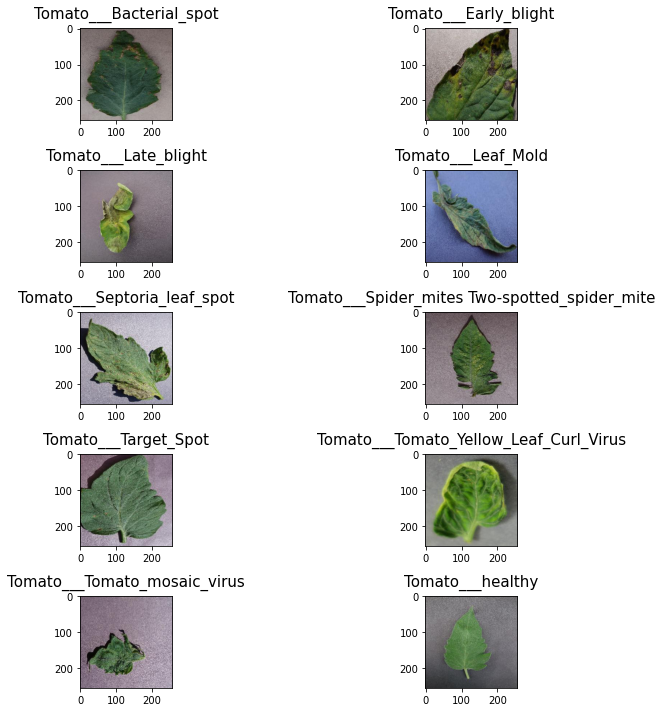

In [10]:
import numpy as np
import matplotlib.pyplot as plt
images = []

for food_folder in sorted(os.listdir(trainFolder)):
    food_items = os.listdir(trainFolder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(trainFolder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(10, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 2, subplot+1)
    fig.set_title(category, pad = 10,size=15)
    plt.imshow(imgs)
    
plt.tight_layout()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        trainFolder,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        testFolder,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


(32, 224, 224, 3)


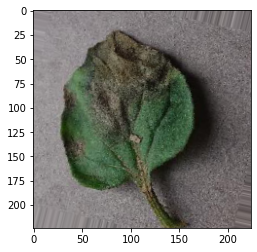

In [12]:
import matplotlib.pyplot as plt

for _ in range(1):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [13]:
class_map = train_generator.class_indices
class_map

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

# Build Model

In [14]:
# Import Library
import tensorflow as tf

In [18]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [19]:
IMG_SIZE = (224,224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [21]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [22]:
base_model.trainable = False

In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [25]:
prediction_layer = tf.keras.layers.Dense(10,activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [26]:
inputs = tf.keras.Input(shape=(224,224,3))
x = preprocess_input(inputs)
x = base_model(x,training=False)
x = global_average_layer(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs,outputs)

In [27]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [29]:
# Train the model
history = model.fit(train_generator, epochs=10, 
                    validation_data = validation_generator, verbose = 1, 
                    )

Epoch 1/10
313/313 [==============================] - 125s 387ms/step - loss: 2.3120 - accuracy: 0.1240 - val_loss: 2.2406 - val_accuracy: 0.1390
Epoch 2/10
313/313 [==============================] - 118s 377ms/step - loss: 2.2488 - accuracy: 0.1629 - val_loss: 2.1838 - val_accuracy: 0.2280
Epoch 3/10
313/313 [==============================] - 116s 372ms/step - loss: 2.1967 - accuracy: 0.1821 - val_loss: 2.1290 - val_accuracy: 0.1990
Epoch 4/10
313/313 [==============================] - 117s 374ms/step - loss: 2.1651 - accuracy: 0.1966 - val_loss: 2.1168 - val_accuracy: 0.1830
Epoch 5/10
313/313 [==============================] - 116s 369ms/step - loss: 2.1457 - accuracy: 0.2168 - val_loss: 2.0845 - val_accuracy: 0.2550
Epoch 6/10
313/313 [==============================] - 117s 372ms/step - loss: 2.1138 - accuracy: 0.2271 - val_loss: 2.0665 - val_accuracy: 0.1500
Epoch 7/10
313/313 [==============================] - 116s 372ms/step - loss: 2.1054 - accuracy: 0.2269 - val_loss: 2.0249 -

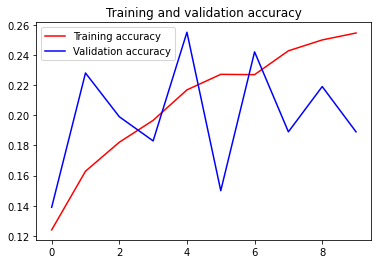

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Build Mode Fix

In [31]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

87924736/87910968 [==============================] - 1s 0us/step


In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [33]:
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
313/313 [==============================] - 130s 398ms/step - loss: 1.2516 - accuracy: 0.5712 - val_loss: 0.9388 - val_accuracy: 0.6720
Epoch 2/5
313/313 [==============================] - 121s 386ms/step - loss: 0.8353 - accuracy: 0.7168 - val_loss: 0.8100 - val_accuracy: 0.7050
Epoch 3/5
313/313 [==============================] - 120s 384ms/step - loss: 0.7477 - accuracy: 0.7410 - val_loss: 0.7680 - val_accuracy: 0.7320
Epoch 4/5
313/313 [==============================] - 121s 388ms/step - loss: 0.6998 - accuracy: 0.7624 - val_loss: 0.7589 - val_accuracy: 0.7450
Epoch 5/5
313/313 [==============================] - 120s 383ms/step - loss: 0.6807 - accuracy: 0.7645 - val_loss: 0.7040 - val_accuracy: 0.7610


In [34]:
model.save('model_inceptionV3_epoch5.h5')

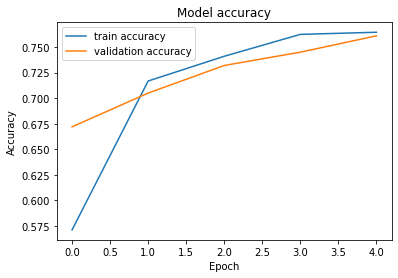

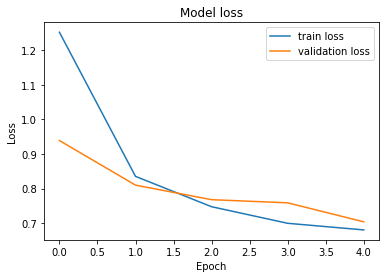

In [35]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(r)
plot_loss(r)

In [36]:
import tensorflow.keras.backend as K

K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [37]:


validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    valFolder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Test Accuracy: 0.761


In [38]:
category={
 0: 'Tomato___Bacterial_spot',
 1: 'Tomato___Early_blight',
 2: 'Tomato___Late_blight',
 3: 'Tomato___Leaf_Mold',
 4: 'Tomato___Septoria_leaf_spot',
 5: 'Tomato___Spider_mites Two-spotted_spider_mite',
 6: 'Tomato___Target_Spot',
 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato___Tomato_mosaic_virus',
 9: 'Tomato___healthy'
 }

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

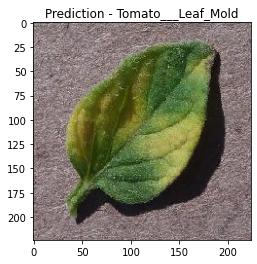

In [39]:
predict_image('/content/tomato/val/Tomato___Leaf_Mold/0a9b3ff4-5343-4814-ac2c-fdb3613d4e4d___Crnl_L.Mold 6559.JPG',model)

# Build Model V2

In [40]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

In [41]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-06 07:00:19--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/inception_v3_weigh 100%[===================>]  83.84M   260MB/s    in 0.3s    

2022-06-06 07:00:20 (260 MB/s) - ‘/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [42]:
# Import the inception model  


# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [43]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False, 
                                  weights = None) 
  
  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model
  

In [44]:
local_weights_file

'/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [45]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [46]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [47]:
# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [48]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output


In [49]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [50]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [51]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = tf.keras.layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = tf.keras.layers.Dense(512,activation='relu')(x)
  # Add a dropout rate of 0.2
  x = tf.keras.layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = tf.keras.layers.Dense(10,activation='softmax')(x)       

  # Create the complete model by using the Model class
  model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model


In [52]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 65,604,010 total parameters in this model.
There are 56,628,746 trainable parameters in this model.


In [53]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 10,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/10
313/313 - 122s - loss: 0.7497 - accuracy: 0.7494 - val_loss: 0.5114 - val_accuracy: 0.8240 - 122s/epoch - 391ms/step
Epoch 2/10
313/313 - 117s - loss: 0.3499 - accuracy: 0.8868 - val_loss: 0.4478 - val_accuracy: 0.8470 - 117s/epoch - 375ms/step
Epoch 3/10
313/313 - 117s - loss: 0.2756 - accuracy: 0.9076 - val_loss: 0.3620 - val_accuracy: 0.8940 - 117s/epoch - 374ms/step
Epoch 4/10
313/313 - 118s - loss: 0.2259 - accuracy: 0.9211 - val_loss: 0.3409 - val_accuracy: 0.8820 - 118s/epoch - 377ms/step
Epoch 5/10
313/313 - 117s - loss: 0.1894 - accuracy: 0.9368 - val_loss: 0.3471 - val_accuracy: 0.8850 - 117s/epoch - 373ms/step
Epoch 6/10
313/313 - 118s - loss: 0.1717 - accuracy: 0.9408 - val_loss: 0.3813 - val_accuracy: 0.8740 - 118s/epoch - 377ms/step
Epoch 7/10
313/313 - 117s - loss: 0.1491 - accuracy: 0.9478 - val_loss: 0.3480 - val_accuracy: 0.8800 - 117s/epoch - 373ms/step
Epoch 8/10
313/313 - 117s - loss: 0.1378 - accuracy: 0.9531 - val_loss: 0.4728 - val_accuracy: 0.8550 - 